In [21]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, Markdown

In [2]:
# Set plotting aesthetics for clearer figures
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


In [3]:
# Read the cardiotocographic CSV into a DataFrame
cardio_df = pd.read_csv("/content/Cardiotocographic.csv")
cardio_df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [4]:
# Show the dataset dimensions
cardio_df.shape

(2126, 14)

In [5]:
# List column names
cardio_df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [6]:
# Preview first rows to inspect values
cardio_df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [7]:
# Inspect structure and detect missing entries
print("\nDataset Info:")
cardio_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [10]:
# Show counts of missing values per column
print("\nMissing Values:")
print(cardio_df.isnull().sum())


Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [11]:
# Cleaning step:
# Replace missing values in numeric columns with the column median
for column_name in cardio_df.columns:
    if cardio_df[column_name].dtype in [np.float64, np.int64]:
        cardio_df[column_name].fillna(cardio_df[column_name].median(), inplace=True)


/tmp/ipython-input-2419917697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cardio_df[column_name].fillna(cardio_df[column_name].median(), inplace=True)


In [12]:
# Re-check missing values to ensure imputation completed
print("\nMissing after cleaning:")
print(cardio_df.isnull().sum())


Missing after cleaning:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [13]:
# Generate descriptive statistics and add median and IQR columns
stats_summary = cardio_df.describe().T
stats_summary["median"] = cardio_df.median()
stats_summary["iqr"] = cardio_df.quantile(0.75) - cardio_df.quantile(0.25)
print("\nStatistical Summary:")
print(stats_summary)



Statistical Summary:
           count        mean        std         min         25%         50%  \
LB        2126.0  133.340204  11.214379   51.842487  126.000000  133.000000   
AC        2126.0    0.003204   0.004373   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000002   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000173   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.276147   7.734851  -50.700000    4.600000    7.400000   
Width     2126.0   70.395387  

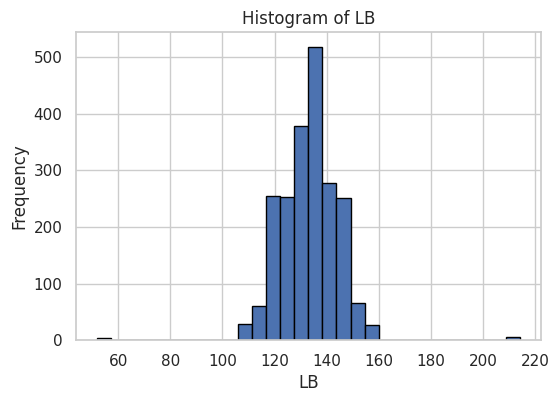

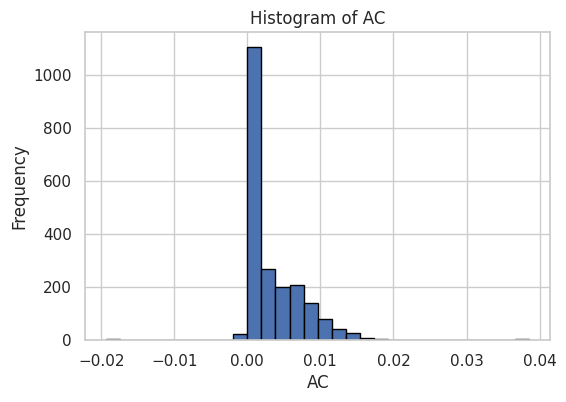

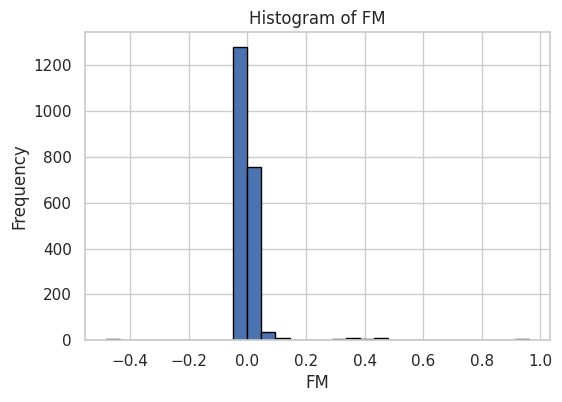

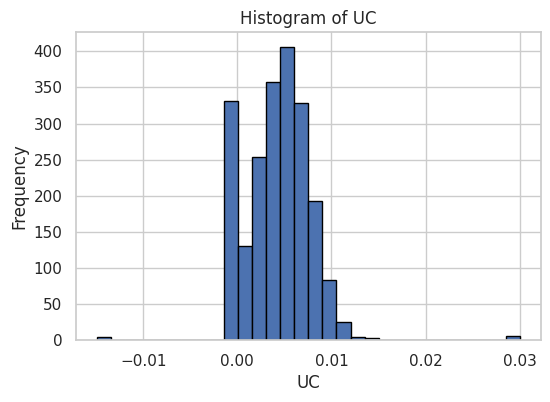

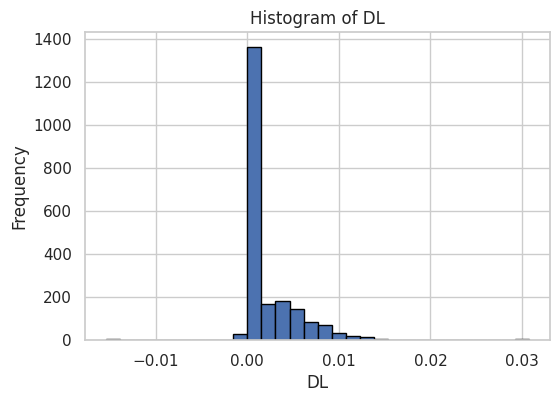

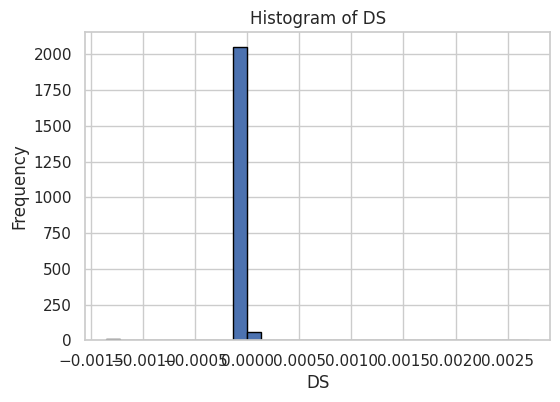

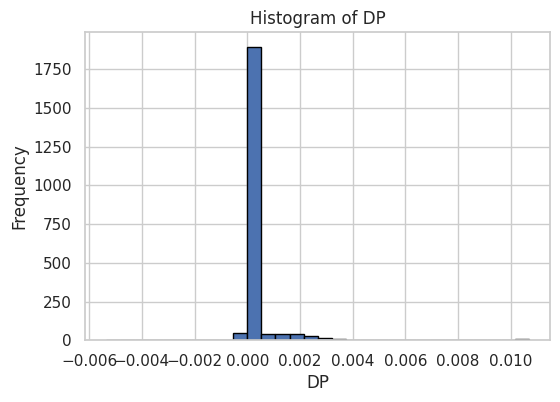

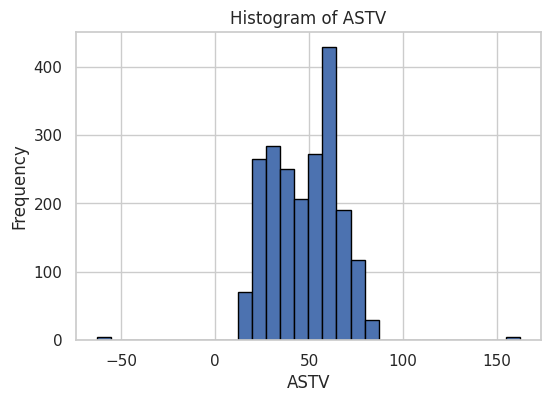

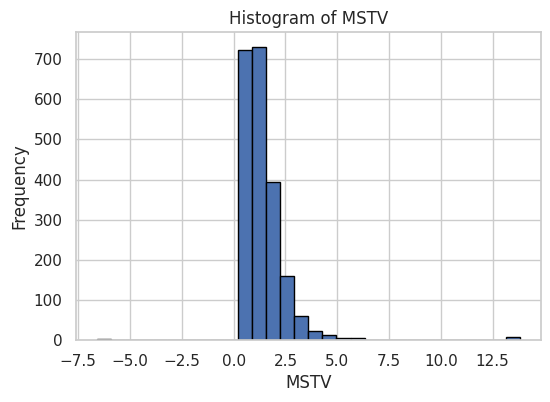

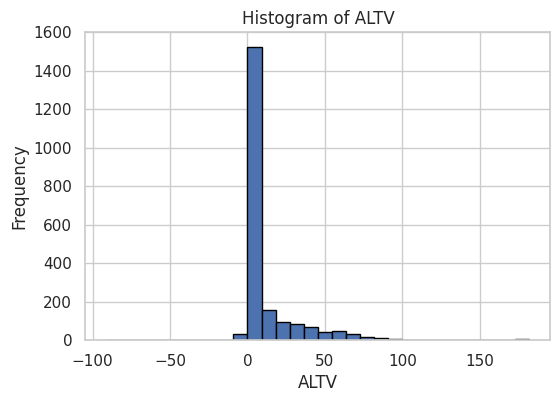

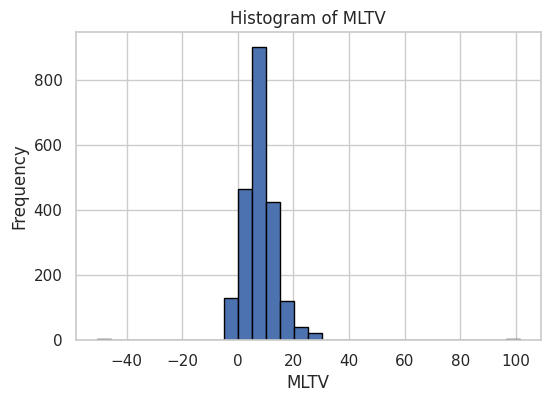

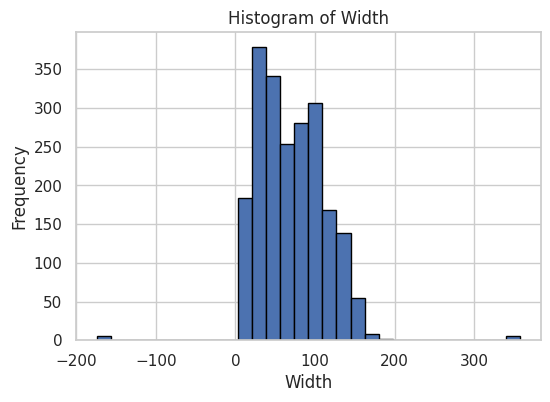

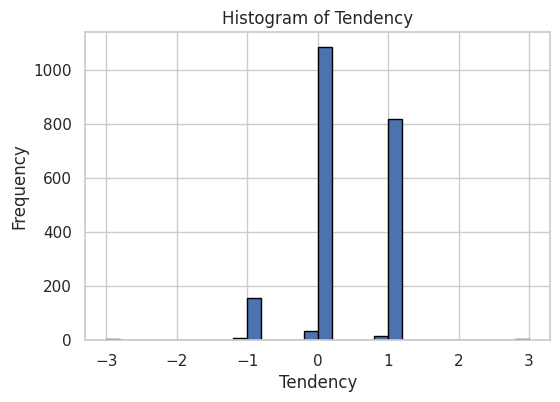

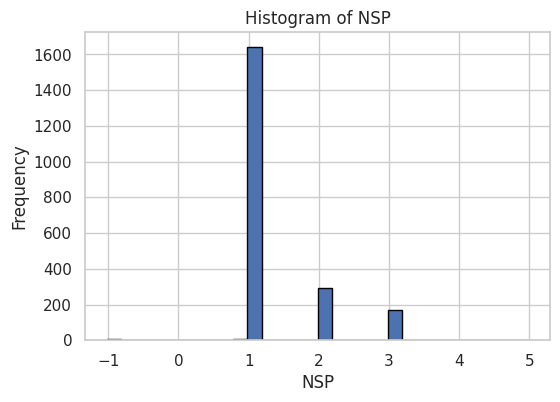

In [14]:
# Plot histograms for each feature to view distributions
for feature in cardio_df.columns:
    plt.figure(figsize=(6,4))
    cardio_df[feature].hist(bins=30, edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


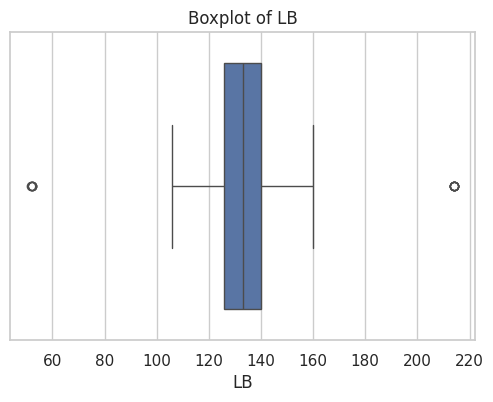

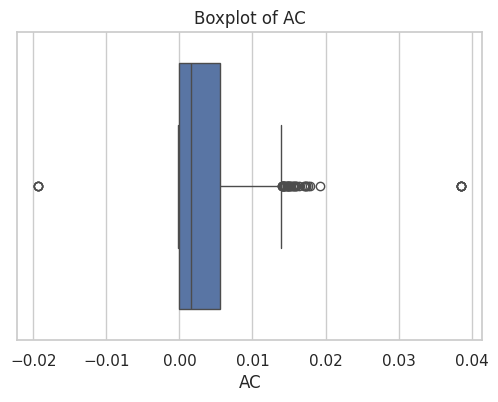

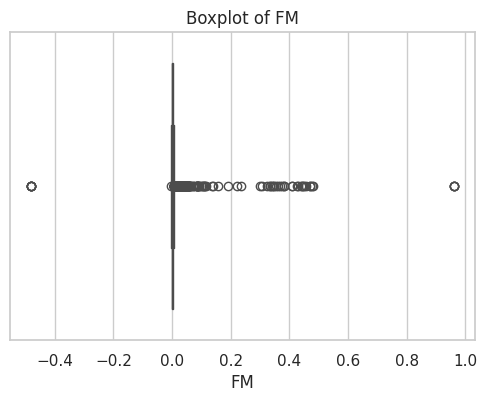

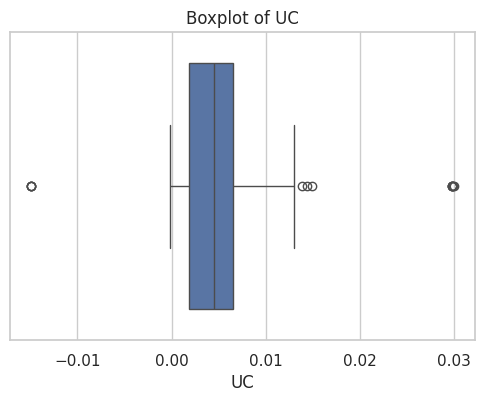

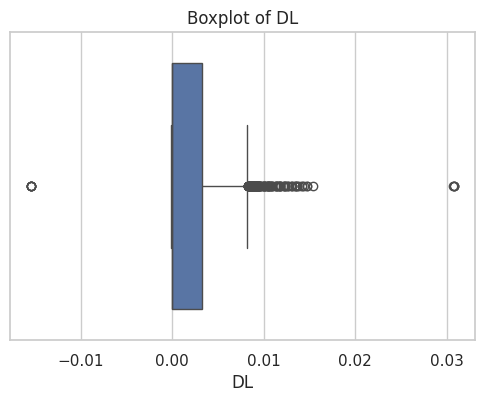

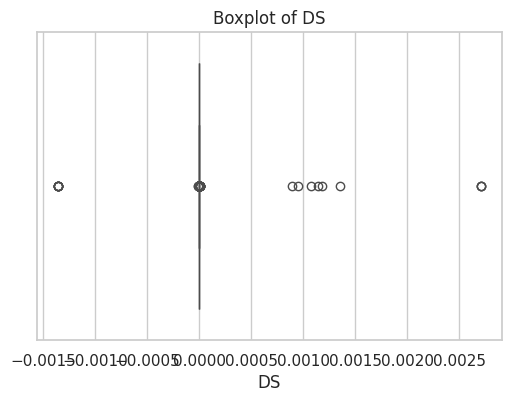

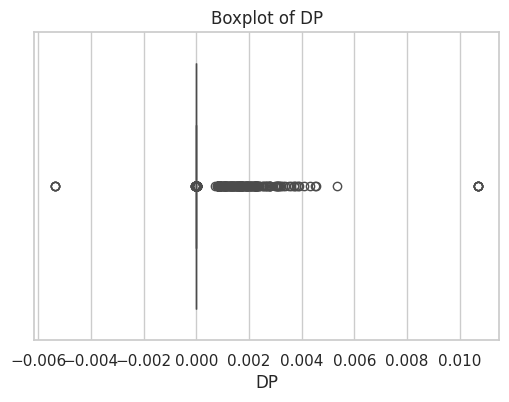

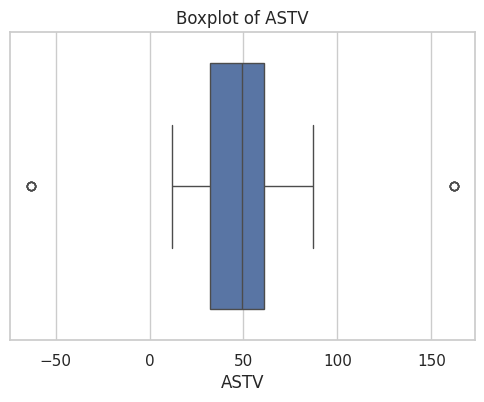

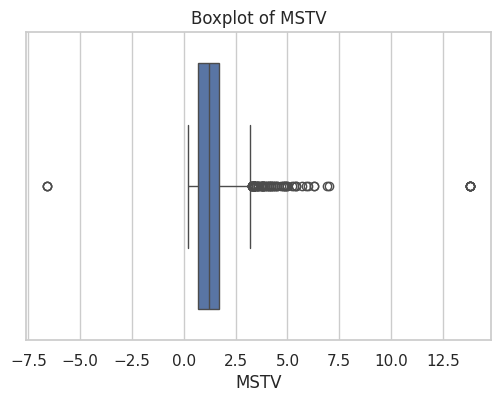

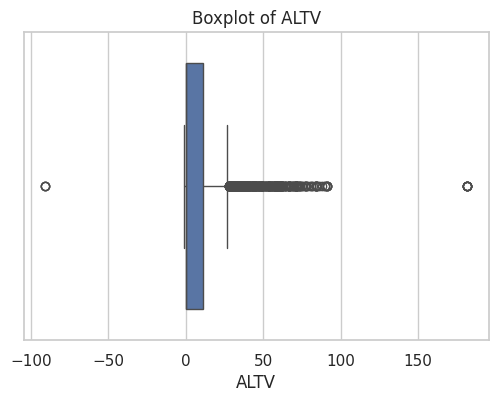

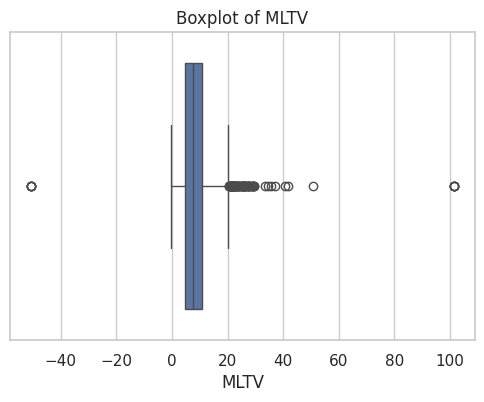

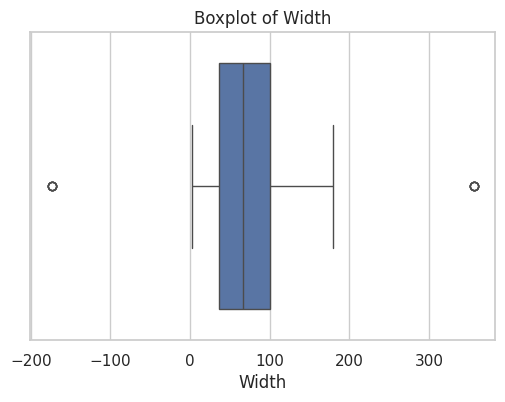

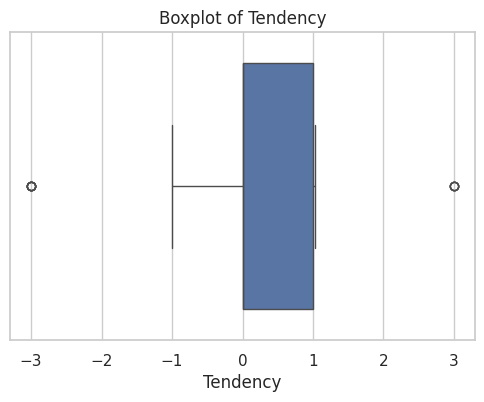

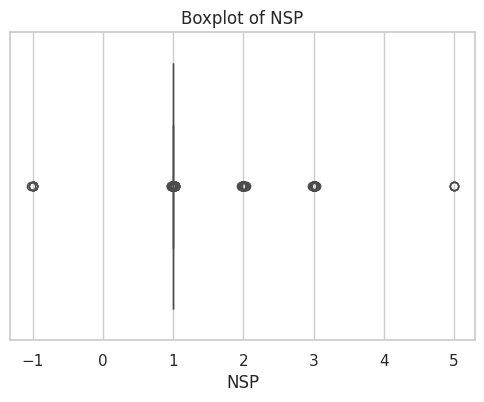

In [15]:
# Plot boxplots to visually examine spread and outliers for each column
for feature in cardio_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cardio_df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

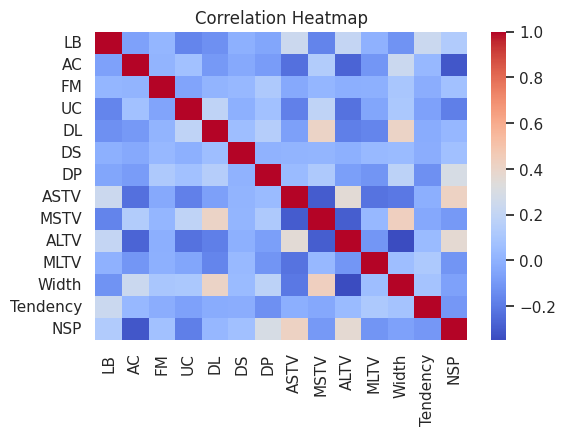

In [16]:
# Compute correlation matrix and display as a heatmap
corr_mat = cardio_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

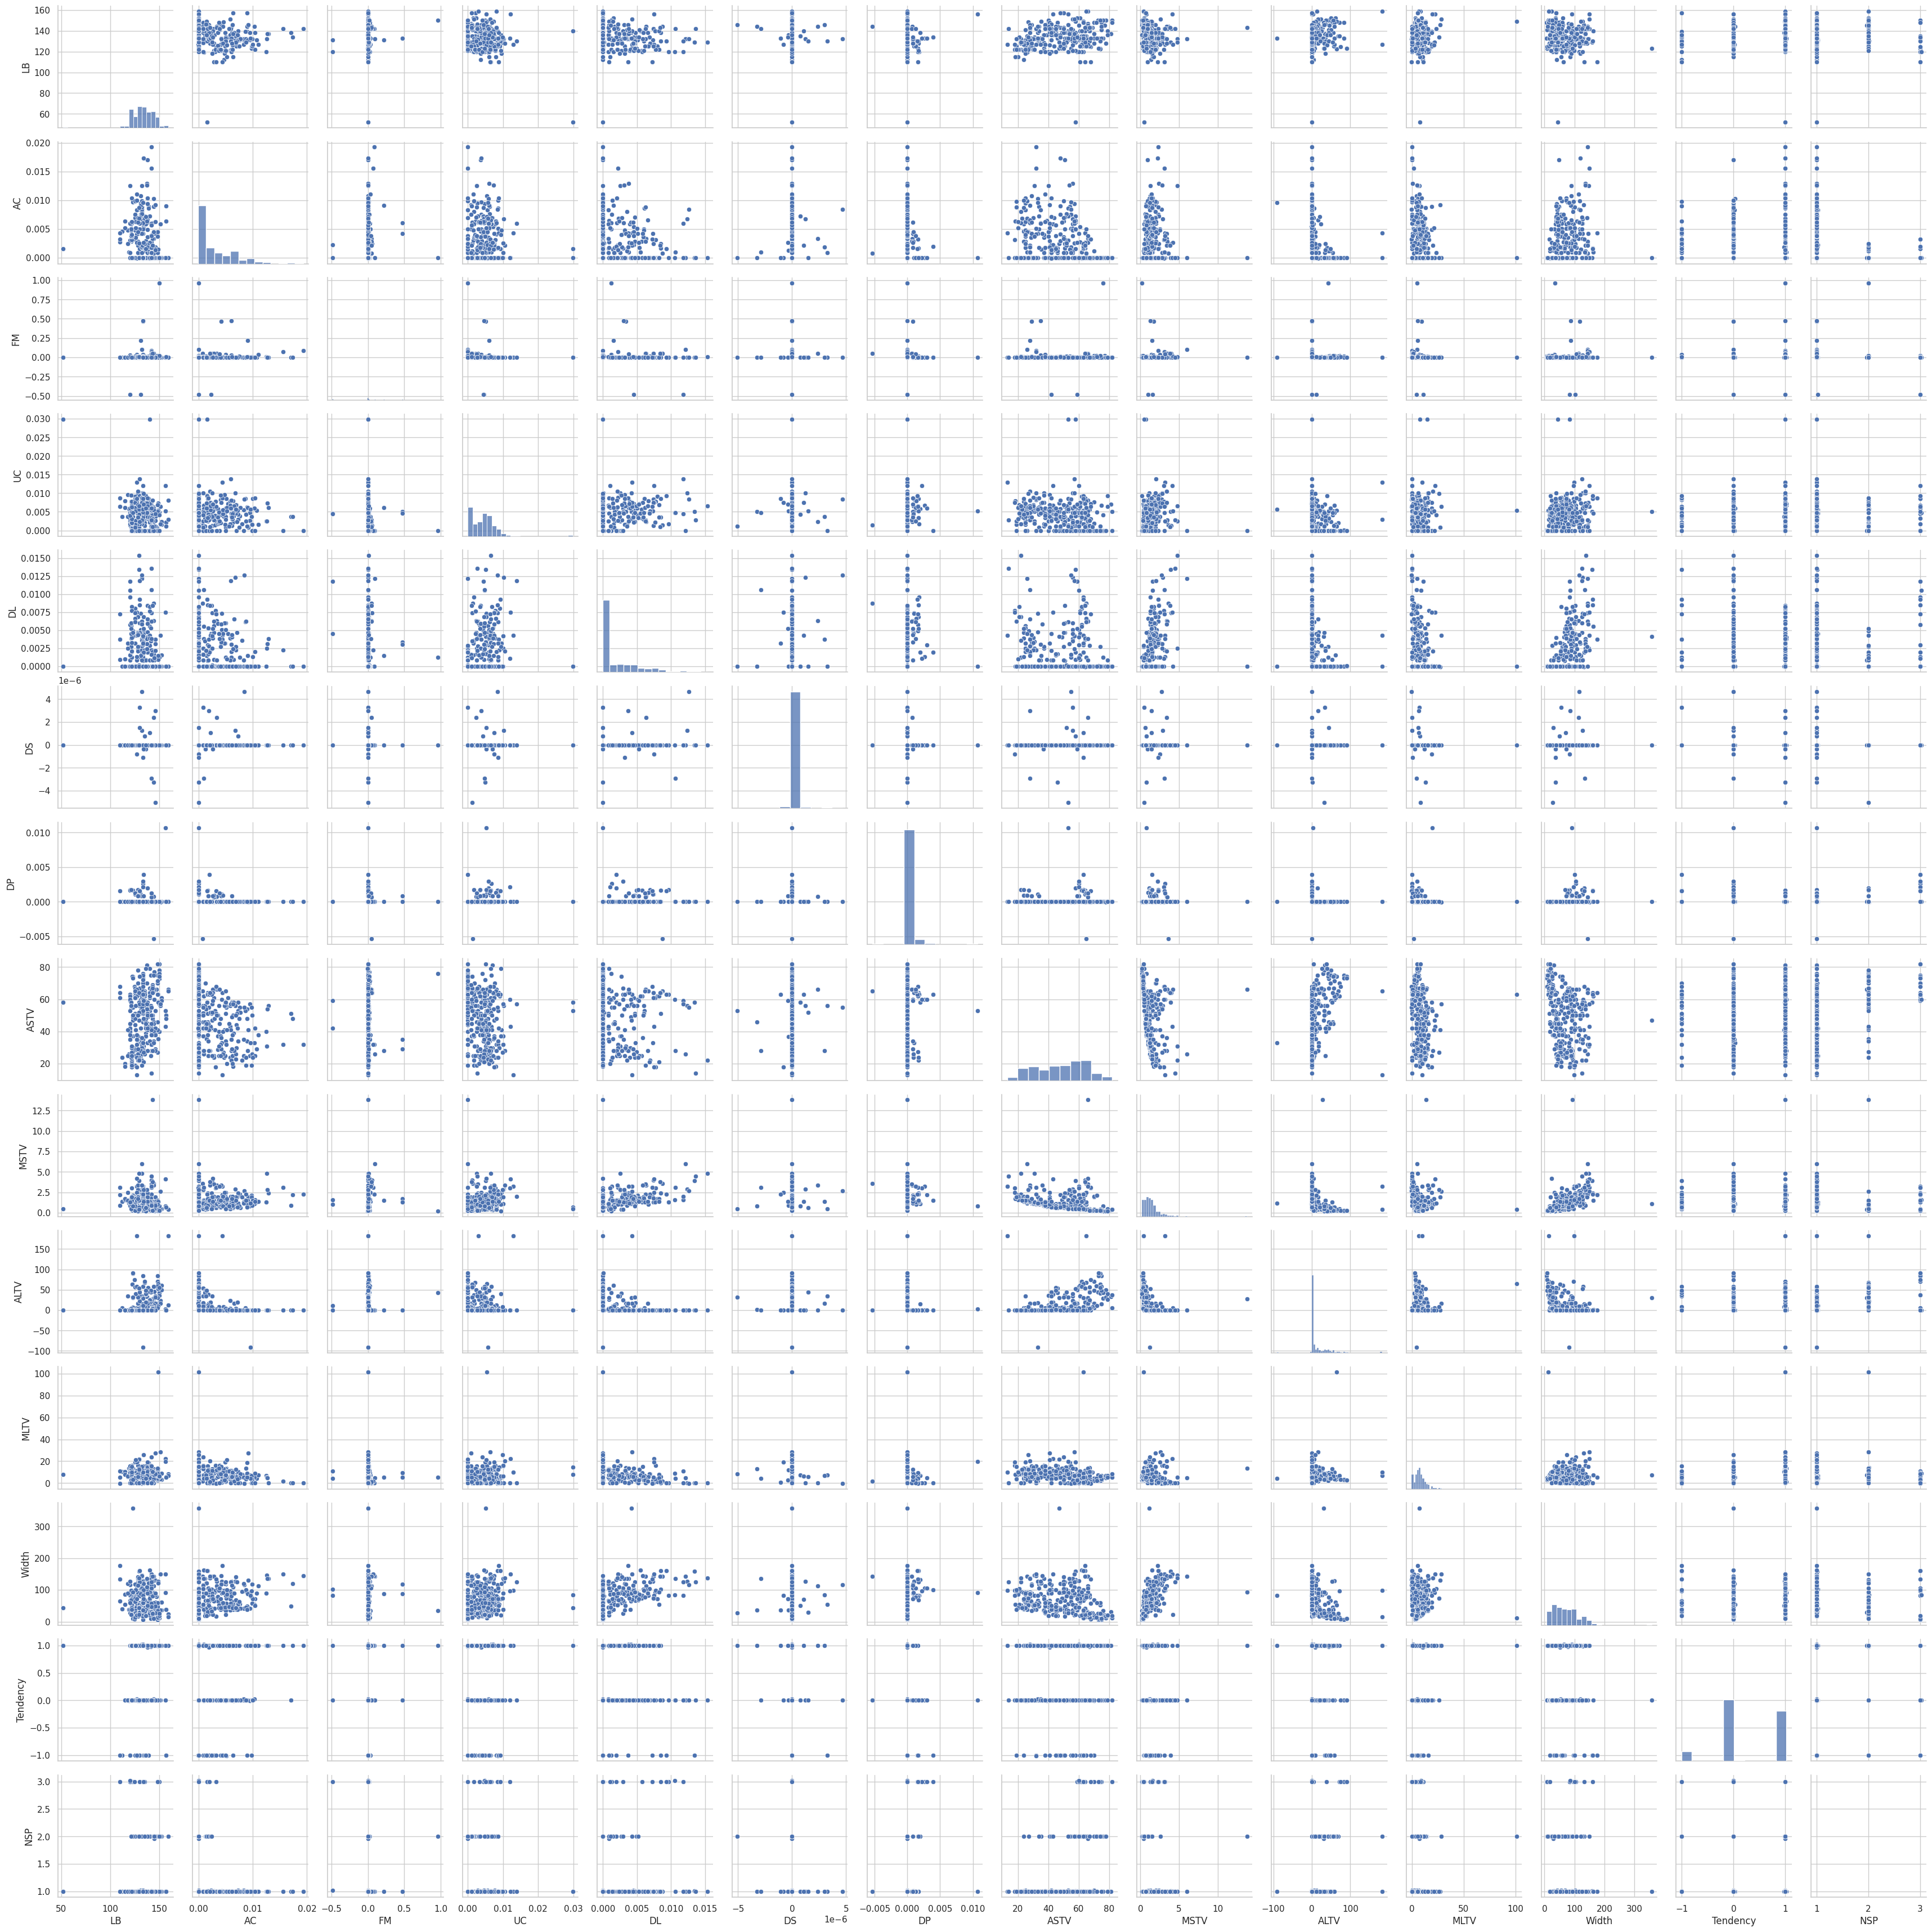

In [17]:
# Pairwise scatterplot matrix — sampling to keep runtime reasonable
sns.pairplot(cardio_df.sample(min(len(cardio_df), 300), random_state=42))
plt.show()


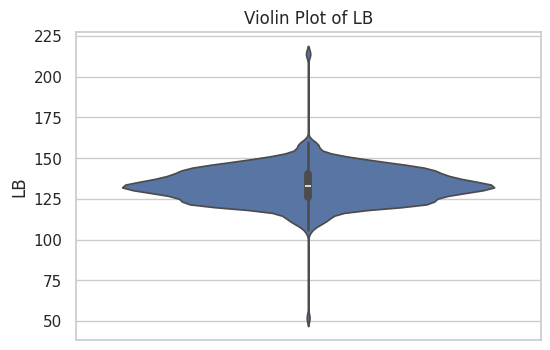

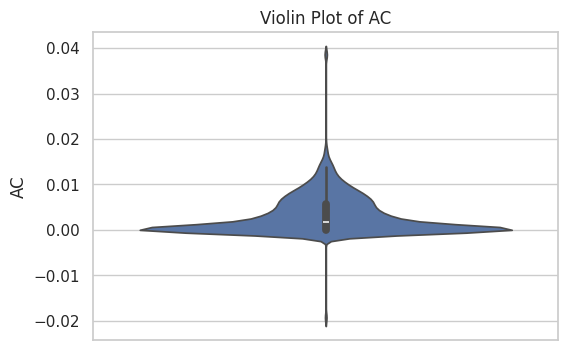

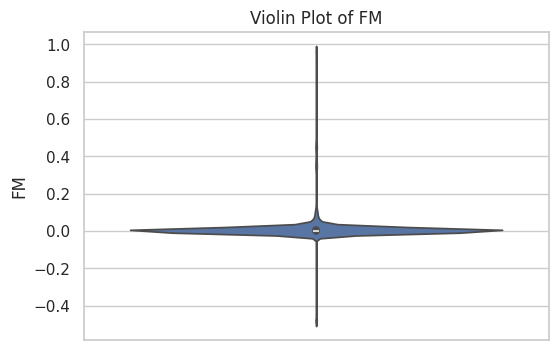

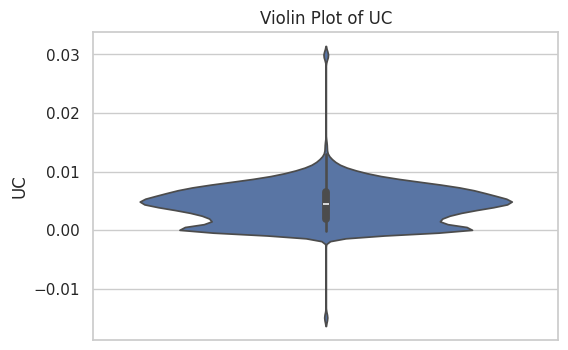

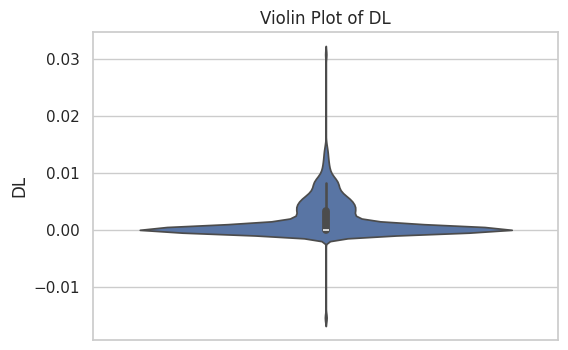

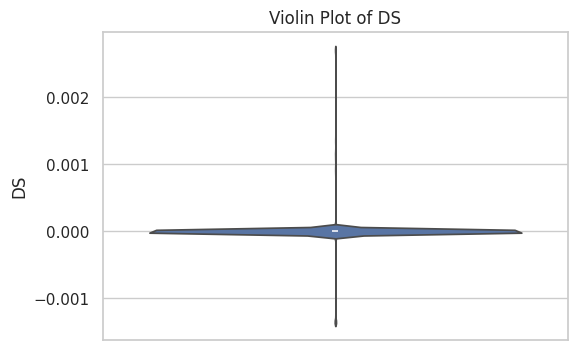

In [18]:
# Violin plots for the first six variables to show distribution shape and density
for feature in cardio_df.columns[:6]:
    plt.figure(figsize=(6,4))
    sns.violinplot(y=cardio_df[feature])
    plt.title(f"Violin Plot of {feature}")
    plt.show()


In [19]:
# Identify and print the top correlated variable pairs (upper triangle used)
top_corr_pairs = (
    corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)
print("\nTop Correlated Pairs:")
print(top_corr_pairs.head(10))


Top Correlated Pairs:
MSTV  Width       0.432822
ASTV  NSP         0.420873
DL    MSTV        0.410102
      Width       0.408578
ALTV  NSP         0.366454
ASTV  ALTV        0.357497
DP    NSP         0.295057
LB    ASTV        0.241857
      Tendency    0.236730
AC    Width       0.234549
dtype: float64


In [22]:
display(Markdown("""
**Conclusion:**

- **Most variables are continuous and numeric.**
- **There are strong correlations between some fetal variability measures.**
- **No extreme missing data after cleaning.**
- **Potential outliers exist in certain measures (observed in boxplots).**
"""))


**Conclusion:**

- **Most variables are continuous and numeric.**
- **There are strong correlations between some fetal variability measures.**
- **No extreme missing data after cleaning.**
- **Potential outliers exist in certain measures (observed in boxplots).**
